# Human Gait Biomechanics Analysis

This repository contains a detailed biomechanical analysis of human gait based on 2D marker tracking data.  
The goal is to visualise and quantify lower-limb motion, joint angles, segment orientations, and muscle lengths.

## 📂 Dataset Overview

The dataset includes the following files:

1. **Tracker Gait Analysis**
   - Raw 2D marker positions of key anatomical points: `shoulder`, `hip`, `knee`, `ankle`, `mt5`.
   - Columns: `x`, `y` coordinates.
   - Frame rate: 30 fps.

2. **Body Segments**
   - 2D positions of body segments: `TRK`, `THIGH`, `LEG`, `FOOT`.
   - Columns: `x`, `y`.

3. **Segments in Degrees**
   - Absolute orientation angles of segments in degrees.
   - Segments: `TRK`, `THIGH`, `LEG`, `FOOT`.
   - This are the points we use to calculare length and angles.

4. **Joint Angles**
   - Calculated angles for `HIP`, `KNE`, `ANK` joints in degrees.
   - Useful for range of motion and inter-joint coordination analysis.

5. **Muscle Length Equations**
   - Polynomial coefficients to estimate lengths of muscles (e.g., Biceps Femoris, Semitendinosus, Vastus Medialis, Vastus Lateralis) as a function of joint angles.
   - Allows dynamic calculation of muscle length across gait cycles.
   - Useful for stress, strain, and muscle biomechanics analysis.

## 📊 Analyses Included

- 2D **stick figure animations** of gait
- **Time-series plots** of segment and joint angles
- **Angle–angle coordination diagrams** (e.g., hip vs knee)
- **Dynamic muscle length plots**
- **Range of motion (ROM)** computation
- Correlation analysis between joint angles and muscle lengths

**All filtered at 30 fps, ideal for smooth temporal analysis.


### Install libraries

In [ ]:
!pip install dash --quiet

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import dash
from dash import dcc, html
import plotly.express as px
import seaborn as sns

## Data Cleaning

#### As the .csv file has mutilevel rows and columns, we have to make a process to prepare and clean data, el procesamiento de limpieza de los datos.

#### We will re-use the same function to our csv files

### As we have the video made it from a camera with 30 fps... we need to convert the data to that exactly time.
#### We will create a new column in our dataframes with the time 

In [ ]:
def add_time_column(df):
    fps = 30  # Videp Fps
    n = len(df)
    df['time'] = np.arange(n) / fps
    return df

## Preparing Data

### Gait Data Analysis

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carolinariddick/tracker-gait-analysis-data")

print("Path to dataset files:", path)

In [ ]:
# import os

# for root, dirs, files in os.walk("/kaggle/input"):
#     print(root)
#     for file in files:
#         print("  -", file)


In [ ]:
import pandas as pd
path = "/kaggle/input/tracker-gait-analysis-data/1 Data With 30 Fps - Tabla 1.csv"   
# path = "/kaggle/input/1 Data With 30 Fps - Tabla 1.csv"
gait_data = read_tracker_csv_multilevel(path, sep=',', verbose=True)
gait_data_df = add_time_column(gait_data)

print(gait_data_df.head())

### Body Segments

In [ ]:
path = "/kaggle/input/tracker-gait-analysis-data/2 Body Segments-Tabla 1.csv"   
body_segments = read_tracker_csv_multilevel(path, sep=',', verbose=True)
body_segments_df = add_time_column(body_segments)

print(body_segments_df.head())

### Body Segments in Degrees

In [ ]:
path = "/kaggle/input/tracker-gait-analysis-data/3 Segments in Degrees-Tabla 1.csv"   

segments_in_degrees = read_tracker_csv_multilevel(path, sep=',', verbose=True)
segments_in_degrees_df = add_time_column(segments_in_degrees)

print(segments_in_degrees_df.head())

### Joint Angles Calculation

In [ ]:
path = "/kaggle/input/tracker-gait-analysis-data/4 Joint Angles Calculate-Tabla 1.csv"   

joint_angles_calculation = read_tracker_csv_multilevel(path, sep=',', verbose=True)
joint_angles_calculation_df = add_time_column(joint_angles_calculation)

print(joint_angles_calculation_df.head())

### Muscle Length Equation

In [ ]:
path = "/kaggle/input/tracker-gait-analysis-data/muscle_length_equations_complete_sin_nombres.csv"   

muscle_length_equation = read_tracker_csv_multilevel(path, sep=',', verbose=True)
muscle_length_equation_df = add_time_column(muscle_length_equation)

print(muscle_length_equation_df.head())

### Once we have all the output with the correct fps, we are ready to use our formula

#### This formula will give us all the angles fro the head to the hip, the knee, ankle, and thumb 
#### like it shows the image:

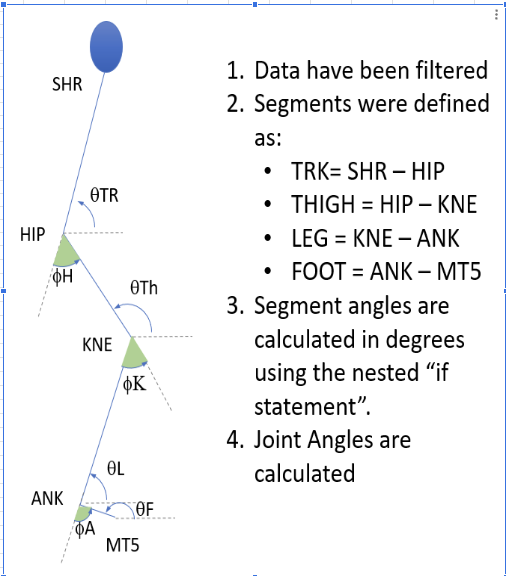


#### This excel also give us the values of the theta angle and how the angles are moving according to the time.

### Qué representa:

Este gráfico traza la trayectoria espacial de la cadera (hip), mostrando cómo se mueve en los ejes:

X: desplazamiento horizontal (avance o lateralidad)

Y: desplazamiento vertical

Z: tiempo (evolución temporal)

### Qué evalúa:

La curva de movimiento de la cadera durante la marcha.

Permite ver si la cadera se desplaza suavemente o con irregularidades.

Un movimiento lineal y fluido indica coordinación adecuada.

Si hay zigzags o cambios abruptos, puede sugerir rotaciones o compensaciones anómalas.

In [ ]:
x = gait_data_df[('hip', 'x')]
y = gait_data_df[('hip', 'y')]
z = gait_data_df['time']

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='lines+markers',
    marker=dict(size=4, color=z, colorscale='Viridis'),
    line=dict(color='blue', width=2)
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X position',
        yaxis_title='Y position',
        zaxis_title='Time (s)'
    ),
    title='3D trajectory of Hip over Time',
    width=800,
    height=600
)
fig.show()

### Trayectorias 3D de varias articulaciones (shoulder, hip, ankle)

#### Qué representa:

Cada línea de color muestra la trayectoria 3D de una articulación distinta a lo largo del tiempo.

1. Azul = hombro
2. Verde = cadera
3. Rojo = tobillo

#### Qué evalúa:

La coordinación intersegmentaria durante el ciclo de la marcha.

Permite visualizar la sincronía de los segmentos corporales.

Si el tobillo muestra gran amplitud, mientras el hombro se mantiene casi estable, se observa una marcha normal con buen balanceo.

Si los patrones están desfasados o erráticos, puede indicar alteraciones en el patrón de movimiento (por ejemplo, compensaciones por debilidad muscular o dolor).

In [ ]:
fig = go.Figure()

for joint, color in zip(['shoulder', 'hip', 'ankle'], ['blue', 'green', 'red']):
    fig.add_trace(go.Scatter3d(
        x=gait_data_df[(joint, 'x')],
        y=gait_data_df[(joint, 'y')],
        z=gait_data_df['time'],
        mode='lines',
        name=joint.title(),
        line=dict(color=color)
    ))

fig.update_layout(
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Time (s)'),
    title='3D trajectories of joints over time'
)

fig.show()

### Trayectoria XY de la cadera (hip)


#### Qué representa:

Es la trayectoria espacial bidimensional de la cadera (hip) en el plano X–Y.
Cada punto es una posición del marcador de la cadera en un frame.

1. Eje X: desplazamiento horizontal (avance o retroceso).
2. Eje Y: desplazamiento vertical (altura de la cadera).

#### Qué evalúa biomecánicamente:

La amplitud de movimiento y el patrón de oscilación de la cadera durante la marcha.

Permite observar la simetría entre pasos (si se repite un patrón cíclico).

Si la curva es suave y periódica → marcha normal y coordinada.

Si hay desplazamientos irregulares o asimetrías → compensación o inestabilidad pélvica.

In [ ]:
plt.plot(gait_data_df['hip'].x,gait_data_df['hip'].y, label='Hip')
plt.legend()

### Ángulos articulares a lo largo del tiempo

#### Qué representa:

Gráfico de cinemática angular: muestra cómo varía el ángulo de cada articulación (hip, knee, ankle) a lo largo del tiempo.

1. Eje X: tiempo o frames de captura.
2. Eje Y: ángulo en grados (°).

Cada curva representa la flexo-extensión de una articulación.

#### Qué evalúa biomecánicamente:

La cinemática articular del miembro inferior durante el ciclo de la marcha.

Permite identificar:

Fases de apoyo y balanceo (picos y valles de cada curva).

Rangos de movimiento (ROM) normales o restringidos.

Desincronización entre articulaciones (indicador de patrones patológicos o compensatorios).

In [ ]:
plt.plot(joint_angles_calculation_df['time'], joint_angles_calculation_df['hip']['q'], label='Hip')
plt.plot(joint_angles_calculation_df['time'], joint_angles_calculation_df['kne']['q'], label='Knee')
plt.plot(joint_angles_calculation_df['time'], joint_angles_calculation_df['ank']['q'], label='Ankle')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()


### Graficar trayectorias (posición 2D)

#### Qué representa:

Este gráfico muestra la posición vertical del hombro (shoulder) a lo largo del tiempo durante la marcha.
El eje X = tiempo (segundos), el eje Y = posición vertical (metros).

#### Qué evalúa:

Las oscilaciones del centro de masa superior durante la caminata.

Cuánto sube y baja el tronco en cada paso.

Un movimiento sinusoidal y regular indica una marcha estable y simétrica.

Si hay asimetrías o picos anómalos, puede reflejar cojera o desequilibrio postural.

In [ ]:
fig = px.line(
    gait_data_df,
    x='time',
    y=gait_data_df['shoulder'].y,
    labels={'value': 'Y position (m)', 'time': 'Time (s)'},
    title='Vertical displacement over time'
)
fig.show()

In [ ]:
fig = px.line(
    gait_data_df,
    x='time',
    y=gait_data_df['hip'].y,
    labels={'value': 'Y position (m)', 'time': 'Time (s)'},
    title='Vertical displacement over time'
)
fig.show()

### Trayectorias verticales Shoulder–Hip–Ankle (Bokeh)

#### Qué representa:

Gráfico comparativo del movimiento vertical (eje Y) de tres segmentos clave: hombro, cadera y tobillo.
Todos se grafican respecto al tiempo (o frames).

1. Azul: Shoulder
2. Verde: Hip
3. Rojo: Ankle

#### Qué evalúa biomecánicamente:
- La coordinación segmentaria vertical del cuerpo durante la marcha.
- Muestra cómo se propagan los movimientos desde el tronco hasta el pie.

La amplitud y fase entre las curvas reflejan:

- Balanceo del tronco (shoulder).
- Movimiento pélvico (hip).
- Contacto y despegue del pie (ankle).

Una sincronización armónica indica una marcha estable y eficiente.

Desfases marcados o curvas fuera de fase pueden sugerir asimetría o déficit neuromuscular.

In [ ]:
output_notebook()

p = figure(title="Shoulder vs Hip Trajectory", 
           x_axis_label='time (s)', 
           y_axis_label='position (m)')
p.line(gait_data_df['time'], gait_data_df['shoulder'].y, line_color="blue", legend_label="Shoulder Y")
p.line(gait_data_df['time'], gait_data_df['hip'].y, line_color="green", legend_label="Hip Y")
p.line(gait_data_df['time'], gait_data_df['ankle'].y, line_color="red", legend_label="Ankle Y")

show(p)

In [ ]:
app = dash.Dash(__name__)

fig = go.Figure()
for joint, color in zip(['shoulder', 'hip', 'ankle', 'mt5'], ['blue', 'green', 'red','black']):
    fig.add_trace(go.Scatter(
        x=gait_data_df['time'],
        y=gait_data_df[f'{joint}'].y,
        mode='lines',
        name=f'{joint.title()} Y',
        line=dict(color=color)
    ))

app.layout = html.Div([
    html.H3("Joint displacement over time"),
    dcc.Graph(figure=fig)
])

fig.show()

### Ángulos de flexión (bending angles)

#### Qué son

- Los bending angles (ángulos de flexión) describen cuánto se dobla una articulación (por ejemplo, rodilla o tobillo) o cuánto se inclina un segmento corporal (tronco, muslo, pierna, pie).
- Es el movimiento angular relativo entre dos segmentos.
- Usaremos:

1. Segments in Degrees
2. Joint Angles Calculate

### (a) Línea temporal de ángulos

Muestra cómo cambian los ángulos de cadera, rodilla y tobillo a lo largo del tiempo:


#### Qué evalúa:

1. Amplitud de movimiento de cada articulación (ROM).
2. Fases del ciclo de marcha (apoyo ↔ balanceo).
3. Asimetrías o rigidez articular.

📚 Referencia:
Winter, D.A. (2009). Biomechanics and Motor Control of Human Movement.
Perry, J., & Burnfield, J. (2010). Gait Analysis: Normal and Pathological Function.

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(joint_angles_calculation_df['time'], 
         joint_angles_calculation_df[('hip','q')], 
         label='Hip')

plt.plot(joint_angles_calculation_df['time'], 
         joint_angles_calculation_df[('kne','q')], 
         label='Knee')

plt.plot(joint_angles_calculation_df['time'], 
         joint_angles_calculation_df[('ank','q')], 
         label='Ankle')

plt.xlabel('Time (s)')
plt.ylabel('Angle (°)')
plt.title('Joint Bending Angles Over Time')
plt.legend()
plt.show()

### (b) Diagrama polar (Cyclogram)

Visualiza el patrón coordinado entre dos articulaciones (por ejemplo, cadera vs rodilla).

#### Qué evalúa:

1. Coordinación entre articulaciones (intersegmental coordination).

Si el bucle es cerrado y suave → patrón normal.
Si el bucle es deformado → descoordinación o compensación.

📚 Referencia:
Borghese, N. A. et al. (1996). “How the brain controls movement: A kinematic analysis of gait.” Experimental Brain Research.

In [ ]:
hip = joint_angles_calculation_df[('hip','q')]
knee = joint_angles_calculation_df[('kne','q')]

plt.figure(figsize=(6,6))
plt.plot(hip, knee)
plt.xlabel('Hip Angle (°)')
plt.ylabel('Knee Angle (°)')
plt.title('Cyclogram: Hip–Knee Coordination')
plt.grid(True)
plt.show()

### Actividad muscular (muscle activity) → Muscle Length or Activation Curves

#### Qué es?

La actividad muscular puede estimarse indirectamente a partir de:

1. Longitud muscular (muscle length): cuánto se estira o acorta un músculo durante la marcha.
2. Ecuaciones de longitud muscular (muscle_length_equations): relacionan el ángulo articular con la longitud de cada músculo.

#### (a) Longitud muscular vs tiempo

#### Qué evalúa:

- Ciclos de alargamiento y acortamiento muscular durante cada paso.

*Los picos indican fase excéntrica o concéntrica del músculo.*

- Permite inferir momentos de activación muscular en el ciclo de marcha (aunque no son señales EMG reales, reflejan el comportamiento cinemático).

📚 Referencia:
Arnold, E.M. et al. (2010). “Muscular contributions to hip and knee extension during the single limb stance phase of gait.” Journal of Biomechanics.
Zajac, F.E. (1989). “Muscle and tendon: properties, models, scaling, and application to biomechanics and motor control.” Critical Reviews in Biomedical Engineering.

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(muscle_length_equation_df['time'], muscle_length_equation_df['biceps femoral'], label='Biceps Femoral')
plt.xlabel('Time (s)')
plt.ylabel('Muscle Length (normalised)')
plt.title('Muscle Length Variation During Gait')
plt.legend()
plt.show()

### (b) Mapa de calor de longitud muscular

#### Qué evalúa:

- Qué músculos cambian más su longitud en cada fase.
- *Las zonas cálidas (rojas) = contracción máxima o alargamiento.*
- Da una visión general del patrón muscular durante la marcha.

📚 Referencia:
Delp, S.L. et al. (2007). OpenSim: Open-source software to create and analyze dynamic simulations of movement. IEEE Transactions on Biomedical Engineering.

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(
    muscle_length_equation_df.iloc[:,1:].T,
    cmap='RdBu_r',
    cbar_kws={'label': 'Normalised Muscle Length'},
    linewidths=0.3,
    linecolor='white',
    center=0,  # útil si tus datos están centrados o normalizados
)

plt.xlabel('Frame (Gait Cycle)')
plt.ylabel('Muscle')
plt.title('Muscle Length Variation Across Gait Cycle', fontsize=14, weight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Segments body y segments body in degrees

##### Estos datasets describen la orientación de los segmentos corporales (tronco, muslo, pierna, pie) en coordenadas espaciales o angulares.

#### (a) Orientación segmentaria angular

#### Qué evalúa:

- Cómo se orientan los segmentos del cuerpo respecto al eje vertical.
- Permite estudiar el acoplamiento de movimiento entre segmentos (por ejemplo, el muslo lidera, el pie sigue).
- Ayuda a detectar alteraciones cinemáticas en el miembro inferior.

📚 Referencia:
Whittle, M. W. (2007). Gait Analysis: An Introduction. Elsevier.

In [ ]:
plt.plot(segments_in_degrees_df['time'], segments_in_degrees_df['thigh'], label='Thigh')
plt.plot(segments_in_degrees_df['time'], segments_in_degrees_df['leg'], label='Leg')
plt.plot(segments_in_degrees_df['time'], segments_in_degrees_df['foot'], label='Foot')
plt.xlabel('Time (s)')
plt.ylabel('Segment Angle (°)')
plt.title('Segment Orientation During Gait')
plt.legend()
plt.show()

| Tipo de análisis        | Dataset                                         | Qué mide                     | Qué evalúa biomecánicamente          | Gráfico sugerido           |
| ----------------------- | ----------------------------------------------- | ---------------------------- | ------------------------------------ | -------------------------- |
| **Bending Angles**      | `segments in degrees`, `joint angles calculate` | Movimiento angular articular | Coordinación, simetría, ROM          | Línea temporal, cyclogram  |
| **Muscle Activity**     | `muscle_length_equations`                       | Longitud muscular estimada   | Activación o comportamiento muscular | Línea temporal, heatmap    |
| **Segment Orientation** | `segments body`, `segments body in degrees`     | Inclinación de segmentos     | Control postural, alineación         | Línea angular por segmento |


### 3D LINE PLOT — Segment Angles vs Time

#### Visualizar cómo cambian los ángulos de varios segmentos corporales (tronco, muslo, pierna, pie) a lo largo del tiempo.
- Esto muestra la coordinación intersegmentaria en un espacio tridimensional.

#### Interpretación biomecánica

1. Eje X = Tiempo
2. Eje Y = Segmento corporal
3. Eje Z = Ángulo (°)

📊 Qué muestra:
Podés ver cómo cada segmento (tronco, muslo, pierna, pie) varía su inclinación a lo largo del ciclo de marcha.
Si las curvas son suaves y paralelas → movimiento coordinado.
Si se cruzan o divergen → desfase angular o compensación.

In [ ]:
fig = go.Figure()

for seg, color in zip(['trk', 'thigh', 'leg', 'foot'],['blue', 'green', 'red']):
    fig.add_trace(go.Scatter3d(
        x=segments_in_degrees_df['time'],
        y=[seg]*len(segments_in_degrees_df),
        z=segments_in_degrees_df[seg].q,
        mode='lines',
        name=joint.title(),
        line=dict(color=color)
    ))


fig.update_layout(
    scene=dict(
        xaxis_title='Time (s)',
        yaxis_title='Segment',
        zaxis_title='Angle (°)'
    ),
    title='Segment Angles Over Time (3D View)',
    width=900,
    height=800
)

fig.show()

### 3D JOINT CYCLOGRAM — Hip–Knee–Ankle Coordination

#### Objetivo
- Mostrar la coordinación angular entre cadera, rodilla y tobillo en 3D.
Es una extensión del cyclogram 2D, pero incorporando tiempo como eje adicional.

#### Dataset ideal
- joint angles calculate o segments body in degrees

-----
#### Interpretación biomecánica

- Cada punto representa una combinación de ángulos de cadera, rodilla y tobillo en un instante.
- La curva completa describe cómo evoluciona la coordinación entre articulaciones durante el ciclo.
- La suavidad o complejidad del trazo indica eficiencia y control motor.

📚 Referencia:
Grieve, D. W. (1968). “Gait patterns and the speed of walking.” Biomedical Engineering.

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=segments_in_degrees_df['trk'].q,
    y=segments_in_degrees_df['thigh'].q,
    z=segments_in_degrees_df['leg'].q,
    mode='lines',
    line=dict(width=4, 
              color=segments_in_degrees_df['time'], 
              colorscale='Viridis'),
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Hip Angle (°)',
        yaxis_title='Knee Angle (°)',
        zaxis_title='Ankle Angle (°)'
    ),
    title='3D Joint Coordination (Hip–Knee–Ankle)',
    width=600,
    height=600
)

fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=joint_angles_calculation_df['hip'].q,
    y=joint_angles_calculation_df['kne'].q,
    z=joint_angles_calculation_df['ank'].q,
    mode='lines',
    line=dict(width=4, 
              color=joint_angles_calculation_df['time'], 
              colorscale='Viridis'),
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Hip Angle (°)',
        yaxis_title='Knee Angle (°)',
        zaxis_title='Ankle Angle (°)'
    ),
    title='3D Joint Coordination (Hip–Knee–Ankle)',
    width=600,
    height=600
)

fig.show()

### 3D SURFACE — Muscle Length vs Joint Angles vs Time
#### Objetivo

- Visualizar cómo la longitud muscular depende de los ángulos articulares y del tiempo.
- Ideal para estimar cuándo un músculo está activo (fase excéntrica/concentrica).

#### Dataset ideal
- muscle_length_equations.csv

#### Interpretación biomecánica

- Permite ver cómo la longitud del bíceps femoral varía según la flexión de cadera y rodilla.
- Las crestas o valles indican fases de máxima extensión o contracción muscular.
- Podés comparar varios músculos (VL, RF, ST, etc.) cambiando biceps_femoral por otro nombre.

In [ ]:
# Surface plot

hip = muscle_length_equation_df['hip']
knee = muscle_length_equation_df['knee']
muscle = muscle_length_equation_df['biceps femoral']
ankle = muscle_length_equation_df['ank']


# Create Grid
H, K = np.meshgrid(hip, knee)
Z = np.outer(muscle, muscle)[:len(hip), :len(knee)]

fig = go.Figure(data=[go.Surface(
    x=H, y=K, z=Z, colorscale='Viridis'
)])
fig.update_layout(
    scene=dict(
        xaxis_title='Hip Angle (°)',
        yaxis_title='Knee Angle (°)',
        zaxis_title='Muscle Length (normalised)'
    ),
    title='Muscle Length Surface (Biceps Femoris)',
    width=800, height=600
)
fig.show()

### 3D BODY SEGMENT TRACE — Postural Dynamics

Si tenés coordenadas (x, y) de marcadores de shoulder, hip, knee, ankle, mt5,
podés armar un modelo 3D animado del movimiento corporal a lo largo del tiempo.

🔹Ejemplo (coordenadas 2D + tiempo → 3D trayectoria)


#### Resultado

- Un modelo de stick figure 3D animado, donde el eje Z representa el tiempo.
Ideal para analizar:
- Alineación corporal
- Coordinación intersegmentaria
- Fluidez del movimiento

In [ ]:
# Extract the coordinates x, y from the internal series
shoulder = gait_data_df['shoulder'].apply(pd.Series)
hip = gait_data_df['hip'].apply(pd.Series)
knee = gait_data_df['knee'].apply(pd.Series)
ankle = gait_data_df['ankle'].apply(pd.Series)
mt5 = gait_data_df['mt5'].apply(pd.Series)

# Create frames for the 3D animation
frames = []
for i in range(len(gait_data_df)):
    frames.append(go.Frame(data=[go.Scatter3d(
        x=[shoulder.loc[i, 'x'], hip.loc[i, 'x'], knee.loc[i, 'x'], ankle.loc[i, 'x'], mt5.loc[i, 'x']],
        y=[shoulder.loc[i, 'y'], hip.loc[i, 'y'], knee.loc[i, 'y'], ankle.loc[i, 'y'], mt5.loc[i, 'y']],
        z=[i]*5,  # el frame index como eje temporal
        mode='lines+markers',
        line=dict(width=5, color='royalblue'),
        marker=dict(size=6, color='crimson')
    )]))


fig = go.Figure(
    data=[go.Scatter3d(mode='lines+markers')],
    frames=frames
)

fig.update_layout(
    scene=dict(
        xaxis_title='X position (m)',
        yaxis_title='Y position (m)',
        zaxis_title='Frame (time)',
    ),
    title='3D Body Segment Motion (2D Projection + Time)',
    width=700,
    height=600,
    margin=dict(r=20, l=10, b=10, t=50),
    updatemenus=[dict(
        type='buttons',
        buttons=[dict(label='Play',
                      method='animate',
                      args=[None, {'frame': {'duration': 100, 'redraw': True},
                                   'fromcurrent': True}])]
    )]
)

fig.show()

| Tipo de gráfico | Ejes (X, Y, Z)                       | Dataset                             | Qué muestra                 |
| --------------- | ------------------------------------ | ----------------------------------- | --------------------------- |
| 3D Line Plot    | Tiempo – Segmento – Ángulo           | `segments body in degrees`          | Coordinación angular global |
| 3D Cyclogram    | Cadera – Rodilla – Tobillo           | `joint angles calculate`            | Coordinación interarticular |
| 3D Surface      | Cadera – Rodilla – Longitud muscular | `muscle_length_equations`           | Actividad muscular estimada |
| 3D Stick Motion | Coordenadas corporales + tiempo      | `segments body` o `raw coordinates` | Movimiento corporal animado |


© 2025 Carolina Riddick. All rights reserved.
This dataset is my own creation and does not represent any organisation, company, or third party.
It is released under the Creative Commons Attribution 4.0 (CC BY 4.0) licence.